In [2]:
# In a mystic dungeon, n magicians are standing in a line. 
# Each magician has an attribute that gives you energy. 
# Some magicians can give you negative energy, which means taking energy from you.
# You have been cursed in such a way that after absorbing energy from magician i, you will be instantly transported to magician (i + k). 
# This process will be repeated until you reach the magician where (i + k) does not exist.
# In other words, you will choose a starting point and then teleport with k jumps until you reach the end of the magicians' sequence, 
# absorbing all the energy during the journey.
# You are given an array energy and an integer k. Return the maximum possible energy you can gain.
# Note that when you are reach a magician, you must take energy from them, whether it is negative or positive energy.

# Example 1:
# Input: energy = [5,2,-10,-5,1], k = 3
# Output: 3

# Example 2:
# Input: energy = [-2,-3,-1], k = 2
# Output: -1

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import numpy as np

## 📚 Step-by-Step Understanding

### Step 1: Understanding the Movement Pattern

When you start at index `i` and `k = 3`, you visit:
- Position: `i` → `i+3` → `i+6` → `i+9` → ... (until out of bounds)

**Key Observation:** All positions form independent "chains" based on their remainder when divided by `k`.

For example, if `k = 3` and `n = 5`:
- Chain 0: indices [0, 3] (indices where i % 3 == 0)
- Chain 1: indices [1, 4] (indices where i % 3 == 1)  
- Chain 2: indices [2] (indices where i % 3 == 2)

### Step 2: The Insight

Since you can start at **any** position and must continue to the end of that chain, we need to:
1. Identify all possible chains
2. For each chain, find which starting position gives maximum energy
3. Return the overall maximum

## 🎨 Visualization: Example 1

Let's visualize `energy = [5, 2, -10, -5, 1]` with `k = 3`

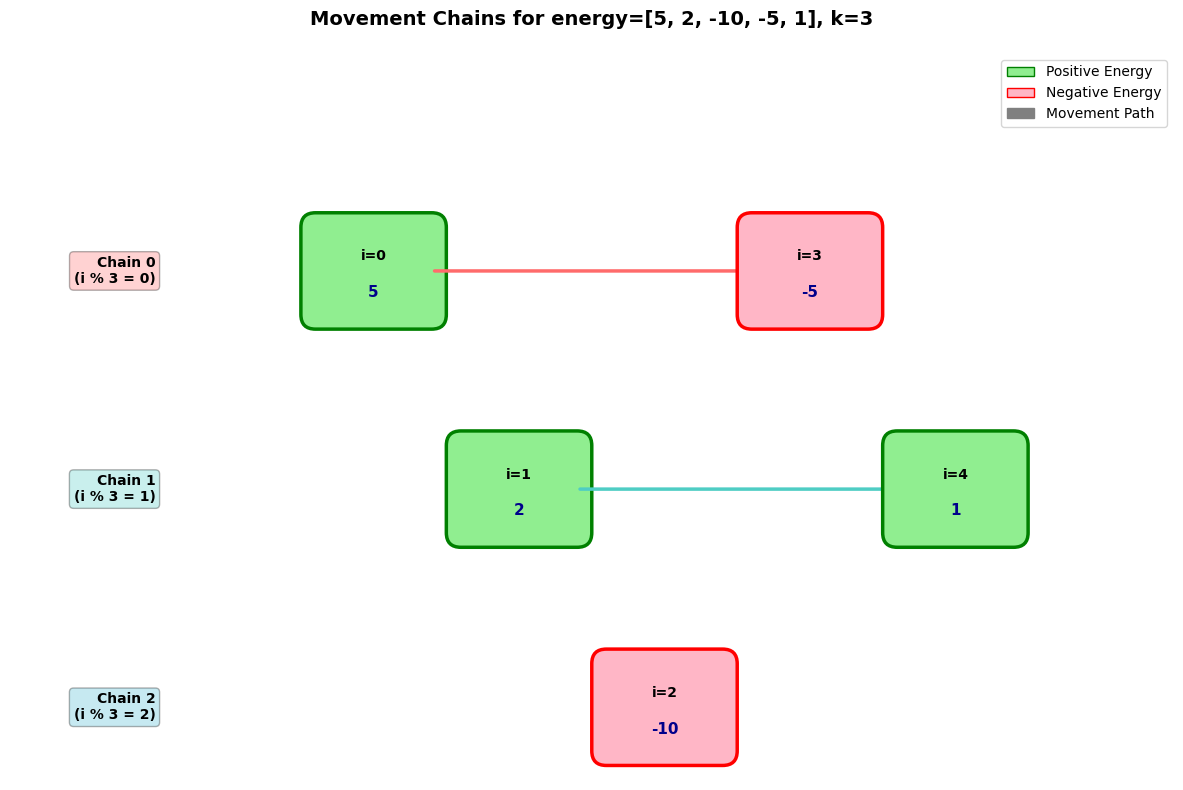

In [3]:
def visualize_chains(energy, k):
    """Visualize all possible chains and paths"""
    n = len(energy)
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Draw all positions
    box_width = 0.8
    box_height = 0.6
    y_spacing = 1.5
    
    # Group by chains (remainder when divided by k)
    chains = {}
    for i in range(n):
        chain_id = i % k
        if chain_id not in chains:
            chains[chain_id] = []
        chains[chain_id].append(i)
    
    # Draw each chain on a separate row
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
    
    for chain_idx, (chain_id, indices) in enumerate(chains.items()):
        y_pos = len(chains) - chain_idx - 1
        
        # Draw boxes for this chain
        for pos_idx, i in enumerate(indices):
            x_pos = i
            
            # Color based on energy value
            if energy[i] >= 0:
                color = '#90EE90'  # Light green for positive
                edge_color = 'green'
            else:
                color = '#FFB6C6'  # Light red for negative
                edge_color = 'red'
            
            # Draw box
            box = FancyBboxPatch((x_pos - box_width/2, y_pos * y_spacing - box_height/2),
                                box_width, box_height,
                                boxstyle="round,pad=0.1",
                                facecolor=color,
                                edgecolor=edge_color,
                                linewidth=2.5)
            ax.add_patch(box)
            
            # Add index and energy value
            ax.text(x_pos, y_pos * y_spacing + 0.1, f'i={i}',
                   ha='center', va='center', fontsize=10, fontweight='bold')
            ax.text(x_pos, y_pos * y_spacing - 0.15, f'{energy[i]}',
                   ha='center', va='center', fontsize=11, fontweight='bold',
                   color='darkblue')
            
            # Draw arrows between consecutive positions in chain
            if pos_idx < len(indices) - 1:
                next_i = indices[pos_idx + 1]
                arrow = FancyArrowPatch((x_pos + box_width/2, y_pos * y_spacing),
                                      (next_i - box_width/2, y_pos * y_spacing),
                                      arrowstyle='->,head_width=0.4,head_length=0.4',
                                      color=colors[chain_idx % len(colors)],
                                      linewidth=2.5,
                                      zorder=1)
                ax.add_patch(arrow)
        
        # Label the chain
        ax.text(-1.5, y_pos * y_spacing, f'Chain {chain_id}\n(i % {k} = {chain_id})',
               ha='right', va='center', fontsize=10, fontweight='bold',
               bbox=dict(boxstyle='round', facecolor=colors[chain_idx % len(colors)], alpha=0.3))
    
    ax.set_xlim(-2.5, n + 0.5)
    ax.set_ylim(-0.5, len(chains) * y_spacing)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Movement Chains for energy={energy}, k={k}', 
                fontsize=14, fontweight='bold', pad=20)
    
    # Add legend
    legend_elements = [
        mpatches.Patch(facecolor='#90EE90', edgecolor='green', label='Positive Energy'),
        mpatches.Patch(facecolor='#FFB6C6', edgecolor='red', label='Negative Energy'),
        mpatches.FancyArrow(0, 0, 1, 0, width=0.1, color='gray', label='Movement Path')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Visualize Example 1
energy1 = [5, 2, -10, -5, 1]
k1 = 3
visualize_chains(energy1, k1)

## 🔍 Analyzing All Possible Paths

For each starting position, let's calculate the total energy collected:

In [4]:
def analyze_all_paths(energy, k):
    """Calculate energy for each starting position"""
    n = len(energy)
    results = []
    
    print(f"Energy array: {energy}")
    print(f"Jump distance k: {k}\n")
    print("="*70)
    
    for start in range(n):
        path = []
        total = 0
        current = start
        
        # Follow the path from this starting position
        while current < n:
            path.append(current)
            total += energy[current]
            current += k
        
        results.append({
            'start': start,
            'path': path,
            'energy_values': [energy[i] for i in path],
            'total': total
        })
        
        # Print the path
        path_str = ' → '.join([f"i={i}({energy[i]:+d})" for i in path])
        print(f"Start at i={start}: {path_str}")
        print(f"  Energy collected: {' + '.join([f'({energy[i]:+d})' for i in path])} = {total}")
        print()
    
    print("="*70)
    max_result = max(results, key=lambda x: x['total'])
    print(f"\n🎯 MAXIMUM ENERGY: {max_result['total']}")
    print(f"   Best starting position: i={max_result['start']}")
    print(f"   Best path: {' → '.join([str(i) for i in max_result['path']])}")
    
    return results

# Analyze Example 1
print("EXAMPLE 1:")
print("-"*70)
results1 = analyze_all_paths(energy1, k1)

EXAMPLE 1:
----------------------------------------------------------------------
Energy array: [5, 2, -10, -5, 1]
Jump distance k: 3

Start at i=0: i=0(+5) → i=3(-5)
  Energy collected: (+5) + (-5) = 0

Start at i=1: i=1(+2) → i=4(+1)
  Energy collected: (+2) + (+1) = 3

Start at i=2: i=2(-10)
  Energy collected: (-10) = -10

Start at i=3: i=3(-5)
  Energy collected: (-5) = -5

Start at i=4: i=4(+1)
  Energy collected: (+1) = 1


🎯 MAXIMUM ENERGY: 3
   Best starting position: i=1
   Best path: 1 → 4


## 💡 Solution Approach: Dynamic Programming (Backwards)

The key insight is to work **backwards** from the end of the array!

### Why Backwards?

- If we know the maximum energy we can get starting from position `i+k`, then:
  - Energy from position `i` = `energy[i]` + (energy from position `i+k`)
  
- Working backwards ensures we've already calculated `i+k` before we calculate `i`

### Algorithm:

1. Create a `dp` array where `dp[i]` = maximum energy starting from position `i`
2. Initialize: `dp[i] = energy[i]` for all positions
3. Iterate **backwards** from `n-k-1` to `0`:
   - `dp[i] = energy[i] + dp[i+k]` (add current energy + best energy from next position)
4. Return `max(dp)` - the maximum among all possible starting positions

Visualizing DP process for Example 1:


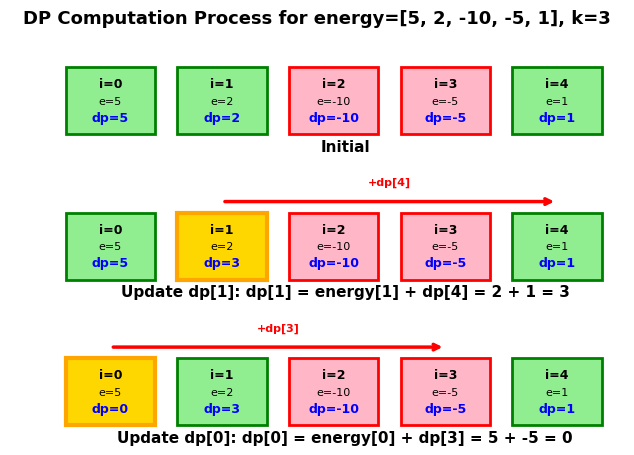


Final DP array: [0, 3, -10, -5, 1]
Maximum energy: 3


In [5]:
def visualize_dp_process(energy, k):
    """Visualize the DP computation step by step"""
    n = len(energy)
    dp = energy.copy()  # Initialize dp with energy values
    
    steps = []
    steps.append(('Initial', dp.copy()))
    
    # Work backwards
    for i in range(n - k - 1, -1, -1):
        dp[i] = energy[i] + dp[i + k]
        steps.append((f'Update dp[{i}]', dp.copy()))
    
    # Create visualization
    num_steps = len(steps)
    fig, axes = plt.subplots(num_steps, 1, figsize=(12, num_steps * 1.5))
    
    if num_steps == 1:
        axes = [axes]
    
    for step_idx, (title, dp_state) in enumerate(steps):
        ax = axes[step_idx]
        
        # Draw boxes for each position
        for i in range(n):
            # Determine color
            if step_idx > 0 and i == n - k - 1 - (step_idx - 1):
                color = '#FFD700'  # Gold for currently updating
                edge_color = 'orange'
                linewidth = 3
            else:
                if dp_state[i] >= 0:
                    color = '#90EE90'
                    edge_color = 'green'
                else:
                    color = '#FFB6C6'
                    edge_color = 'red'
                linewidth = 2
            
            # Draw box
            rect = mpatches.Rectangle((i, 0), 0.8, 0.6, 
                                     facecolor=color, 
                                     edgecolor=edge_color,
                                     linewidth=linewidth)
            ax.add_patch(rect)
            
            # Add text
            ax.text(i + 0.4, 0.45, f'i={i}', ha='center', va='center', 
                   fontsize=9, fontweight='bold')
            ax.text(i + 0.4, 0.3, f'e={energy[i]}', ha='center', va='center', 
                   fontsize=8)
            ax.text(i + 0.4, 0.15, f'dp={dp_state[i]}', ha='center', va='center', 
                   fontsize=9, fontweight='bold', color='blue')
            
            # Draw arrow showing dependency
            if step_idx > 0 and i == n - k - 1 - (step_idx - 1) and i + k < n:
                ax.annotate('', xy=(i + k + 0.4, 0.7), xytext=(i + 0.4, 0.7),
                          arrowprops=dict(arrowstyle='->', lw=2.5, color='red'))
                ax.text((i + i + k) / 2 + 0.4, 0.85, f'+dp[{i+k}]', 
                       ha='center', fontsize=8, color='red', fontweight='bold')
        
        ax.set_xlim(-0.5, n)
        ax.set_ylim(-0.1, 1)
        ax.set_aspect('equal')
        ax.axis('off')
        
        # Add title
        step_title = title
        if step_idx > 0:
            i = n - k - 1 - (step_idx - 1)
            step_title += f': dp[{i}] = energy[{i}] + dp[{i+k}] = {energy[i]} + {dp[i+k]} = {dp[i]}'
        
        ax.text(n/2, -0.15, step_title, ha='center', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.suptitle(f'DP Computation Process for energy={energy}, k={k}', 
                fontsize=13, fontweight='bold', y=1.0)
    plt.subplots_adjust(top=0.97)
    plt.show()
    
    return dp

print("Visualizing DP process for Example 1:")
dp_result = visualize_dp_process(energy1, k1)
print(f"\nFinal DP array: {dp_result}")
print(f"Maximum energy: {max(dp_result)}")

## 🎯 Final Solution Implementation

In [6]:
class Solution:
    def maximumEnergy(self, energy: list[int], k: int) -> int:
        """
        Find maximum energy that can be collected from the dungeon.
        
        Time Complexity: O(n) - single pass through array
        Space Complexity: O(n) - dp array
        
        Args:
            energy: List of energy values at each position
            k: Jump distance
            
        Returns:
            Maximum energy that can be collected
        """
        n = len(energy)
        
        # dp[i] represents the maximum energy we can get starting from position i
        dp = energy.copy()
        
        # Work backwards from position n-k-1 to 0
        # We start from n-k-1 because positions >= n-k have no next position
        for i in range(n - k - 1, -1, -1):
            # Energy from position i = current energy + energy from next position (i+k)
            dp[i] = energy[i] + dp[i + k]
        
        # Return the maximum energy among all possible starting positions
        return max(dp)

# Test with examples
solution = Solution()

print("TEST CASES:")
print("="*70)

# Example 1
energy1 = [5, 2, -10, -5, 1]
k1 = 3
result1 = solution.maximumEnergy(energy1, k1)
print(f"Example 1: energy={energy1}, k={k1}")
print(f"Output: {result1}")
print(f"Expected: 3 ✓" if result1 == 3 else f"Expected: 3 ✗")
print()

# Example 2
energy2 = [-2, -3, -1]
k2 = 2
result2 = solution.maximumEnergy(energy2, k2)
print(f"Example 2: energy={energy2}, k={k2}")
print(f"Output: {result2}")
print(f"Expected: -1 ✓" if result2 == -1 else f"Expected: -1 ✗")
print()

# Additional test case
energy3 = [1, -1, -2, 3, 4]
k3 = 2
result3 = solution.maximumEnergy(energy3, k3)
print(f"Example 3: energy={energy3}, k={k3}")
print(f"Output: {result3}")
print(f"Paths: i=0: 1→-2=-1, i=1: -1→3=2, i=2: -2→4=2, i=3: 3, i=4: 4")
print(f"Expected: 4 ✓" if result3 == 4 else f"Expected: 4 ✗")

TEST CASES:
Example 1: energy=[5, 2, -10, -5, 1], k=3
Output: 3
Expected: 3 ✓

Example 2: energy=[-2, -3, -1], k=2
Output: -1
Expected: -1 ✓

Example 3: energy=[1, -1, -2, 3, 4], k=2
Output: 4
Paths: i=0: 1→-2=-1, i=1: -1→3=2, i=2: -2→4=2, i=3: 3, i=4: 4
Expected: 4 ✓


## 📊 Visualize Example 2

Let's also visualize the second example to solidify understanding:


EXAMPLE 2:
----------------------------------------------------------------------


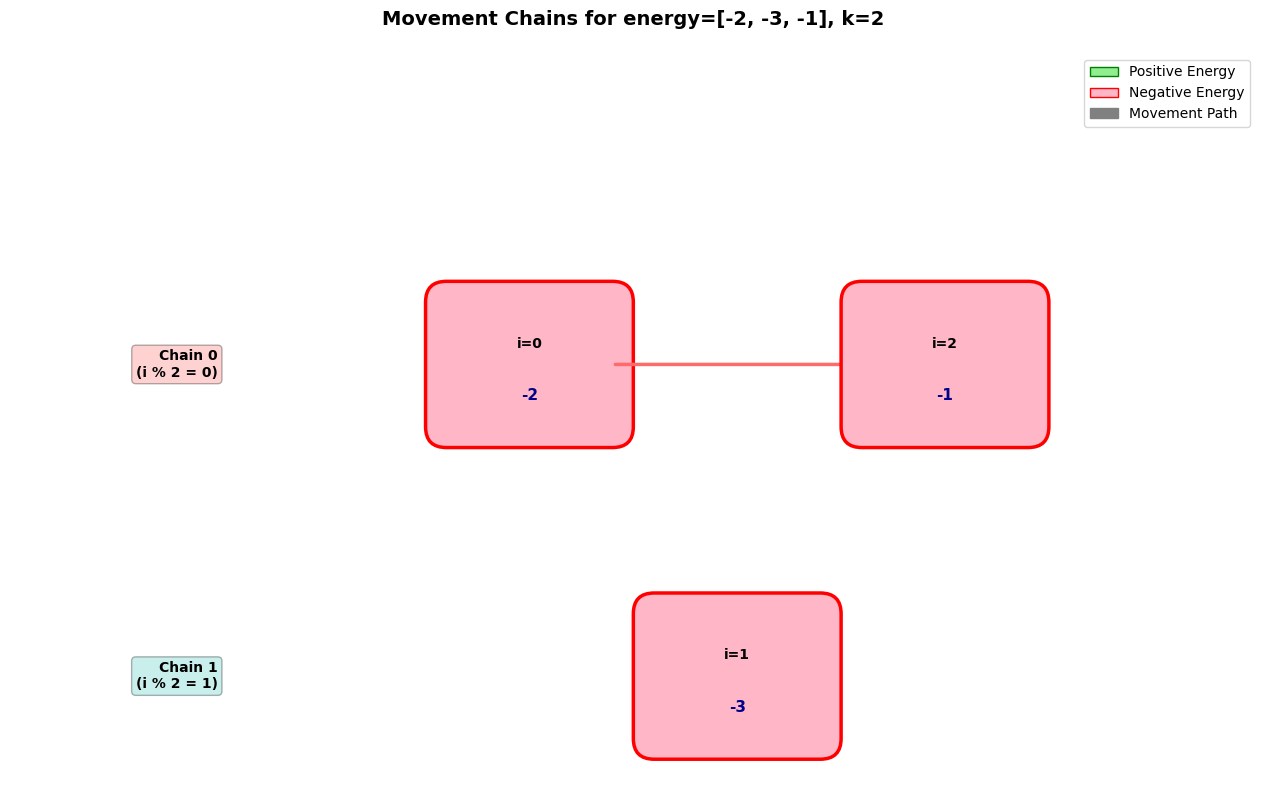



Energy array: [-2, -3, -1]
Jump distance k: 2

Start at i=0: i=0(-2) → i=2(-1)
  Energy collected: (-2) + (-1) = -3

Start at i=1: i=1(-3)
  Energy collected: (-3) = -3

Start at i=2: i=2(-1)
  Energy collected: (-1) = -1


🎯 MAXIMUM ENERGY: -1
   Best starting position: i=2
   Best path: 2




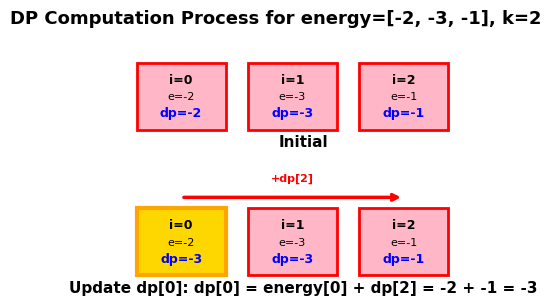


Final DP array: [-3, -3, -1]
Maximum energy: -1


In [7]:
energy2 = [-2, -3, -1]
k2 = 2

print("\nEXAMPLE 2:")
print("-"*70)
visualize_chains(energy2, k2)

print("\n")
results2 = analyze_all_paths(energy2, k2)

print("\n")
dp_result2 = visualize_dp_process(energy2, k2)
print(f"\nFinal DP array: {dp_result2}")
print(f"Maximum energy: {max(dp_result2)}")

## 🎓 Key Takeaways and Problem-Solving Strategy

### Core Concepts:

1. **Identify the Pattern**: Movement is in fixed steps of `k`, creating independent chains

2. **Choose the Right Direction**: Working backwards simplifies the DP logic
   - Forward: Would need to track multiple possible paths
   - Backward: Each position has only ONE next position to consider

3. **DP State Definition**: `dp[i]` = maximum energy starting from position `i`

4. **Recurrence Relation**: `dp[i] = energy[i] + dp[i+k]` (if `i+k` exists)

### When to Use This Approach:

- **Path problems** with fixed jump sizes
- When you can start from **any position**
- When you need to **maximize/minimize** a cumulative value
- When the problem has **optimal substructure** (optimal solution contains optimal solutions to subproblems)

### Time & Space Complexity:

- **Time**: O(n) - single pass through array
- **Space**: O(n) - dp array (can be optimized to O(k) by only keeping last k values)

### Common Mistakes to Avoid:

1. ❌ Working forwards (more complex logic)
2. ❌ Forgetting that energy can be negative
3. ❌ Not considering all possible starting positions
4. ❌ Off-by-one errors in the loop range

## 🚀 Practice Exercise

Try solving this variation on your own:

**Problem**: What if you could choose to skip the next magician (stay at `i` or jump to `i+k`)?

Think about:
- How would the DP state change?
- What would the recurrence relation be?
- Would you still work backwards?

<details>
<summary>Click for hint</summary>

The recurrence would be:
```
dp[i] = energy[i] + max(dp[i+1], dp[i+k])
```
You'd need to consider both choices at each step!
</details>